In [1]:
library(xlsx)
# general imputation
library(imputeTS)
# Nearest interpolation
library(pracma)
# local polynomical imputation
library(spatialEco)
# KNN imputation
library(VIM)
# setwd("~/GitHub/datasci-strata-talk-missing-data")


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Registered S3 methods overwritten by 'forecast':
  method             from    
  fitted.fracdiff    fracdiff
  residuals.fracdiff fracdiff
Loading required package: colorspace
Loading required package: grid
Loading required package: data.table
VIM is ready to use. 
 Since version 4.0.0 the GUI is in its own package VIMGUI.

          Please use the package to use the new (and old) GUI.

Suggestions and bug-reports can be submitted at: https://github.com/alexkowa/VIM/issues

Attaching package: ‘VIM’

The following object is masked from ‘package:datasets’:

    sleep



# load data 

,Minute_of_Day,Inferred_Glucose
14,14,6.00
29,29,6.05
32,32,6.10
43,43,6.20
59,59,6.10
74,74,5.90


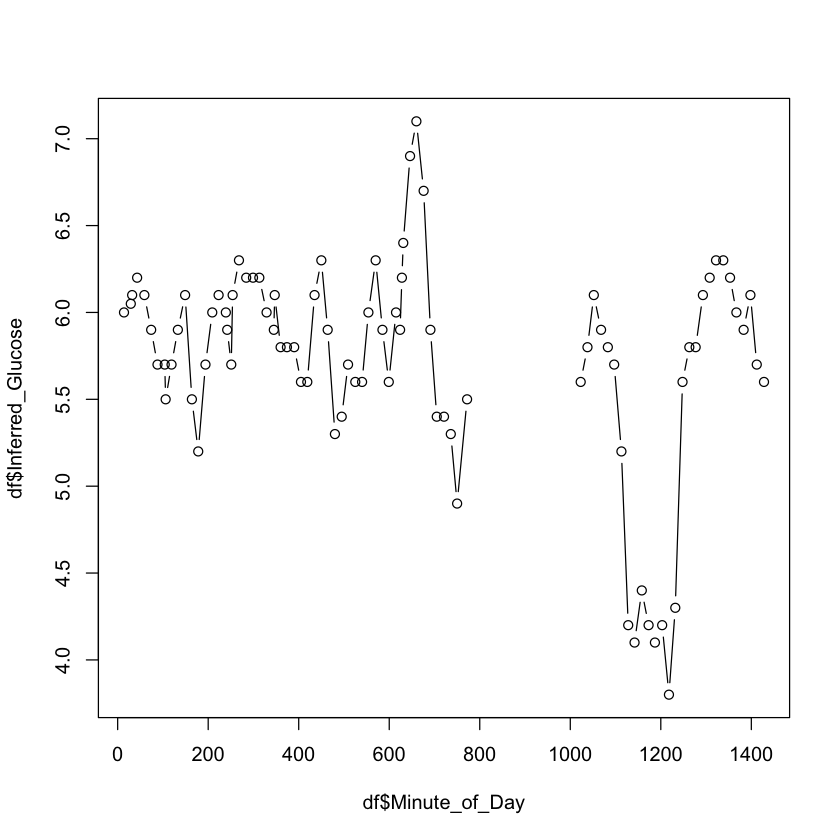

In [2]:
df <- read.xlsx("glucose.xlsx", 
                sheetName = "Sheet1")
df[1] <- NULL
rownames(df) <- df$Minute_of_Day

head(df)
plot(df$Minute_of_Day, df$Inferred_Glucose, type = 'b')

# find missing minutes
missing_minutes <- df[which(is.na(df$Inferred_Glucose)), 'Minute_of_Day']


# Nearest Neighbor

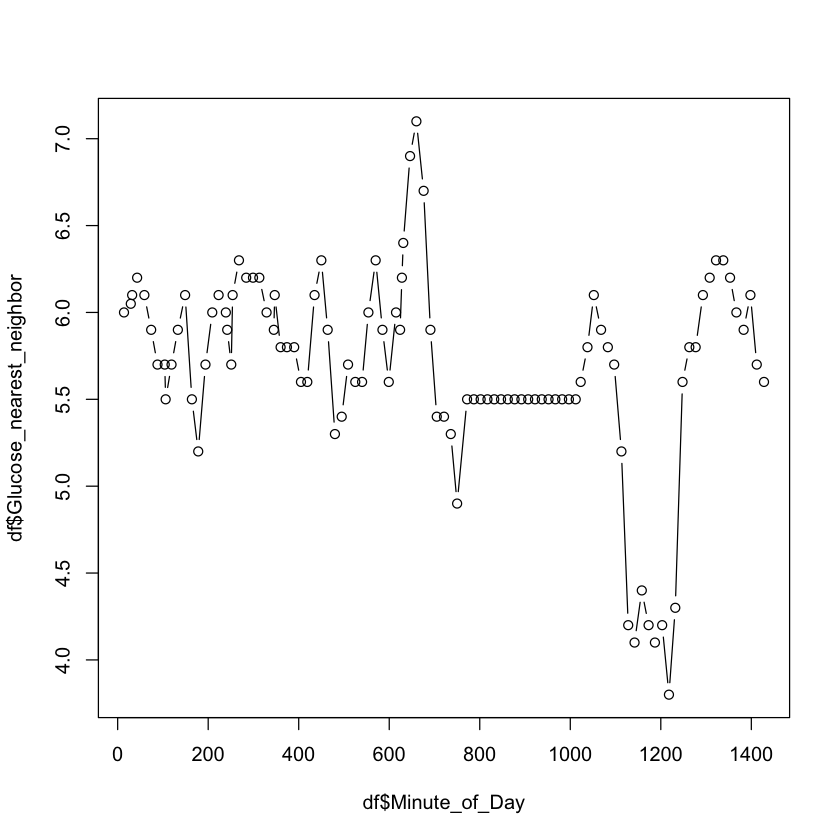

In [3]:
df['Glucose_nearest_neighbor'] <- interp1(df$Minute_of_Day, df$Inferred_Glucose, method = 'nearest')
plot(df$Minute_of_Day, df$Glucose_nearest_neighbor, type = 'b')


# Last-Observed Carry Forward (LOCF)

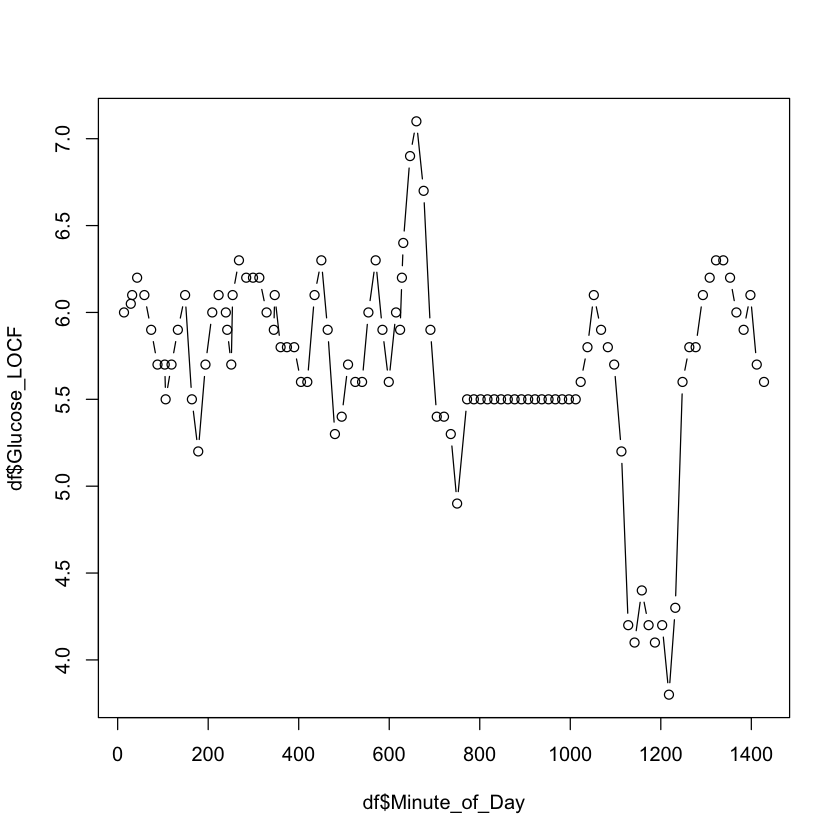

In [4]:
df['Glucose_LOCF'] <- na_locf(df$Inferred_Glucose)
plot(df$Minute_of_Day, df$Glucose_LOCF, type = 'b')


# Mean Value

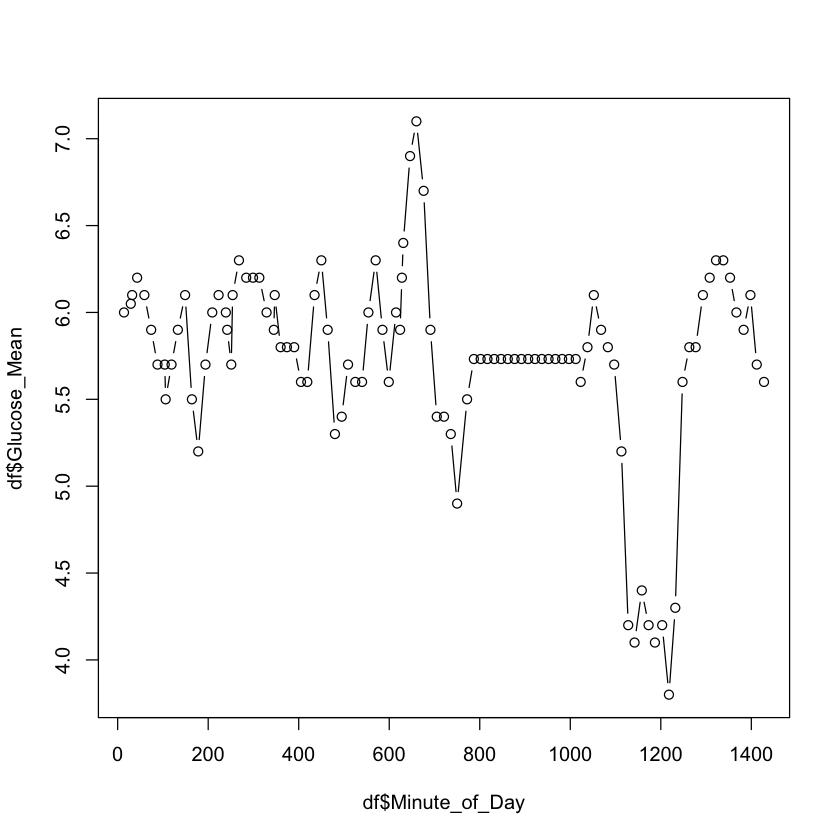

In [5]:
df['Glucose_Mean'] <- na_mean(df$Inferred_Glucose)
plot(df$Minute_of_Day, df$Glucose_Mean, type = 'b')


# Linear Interpolation

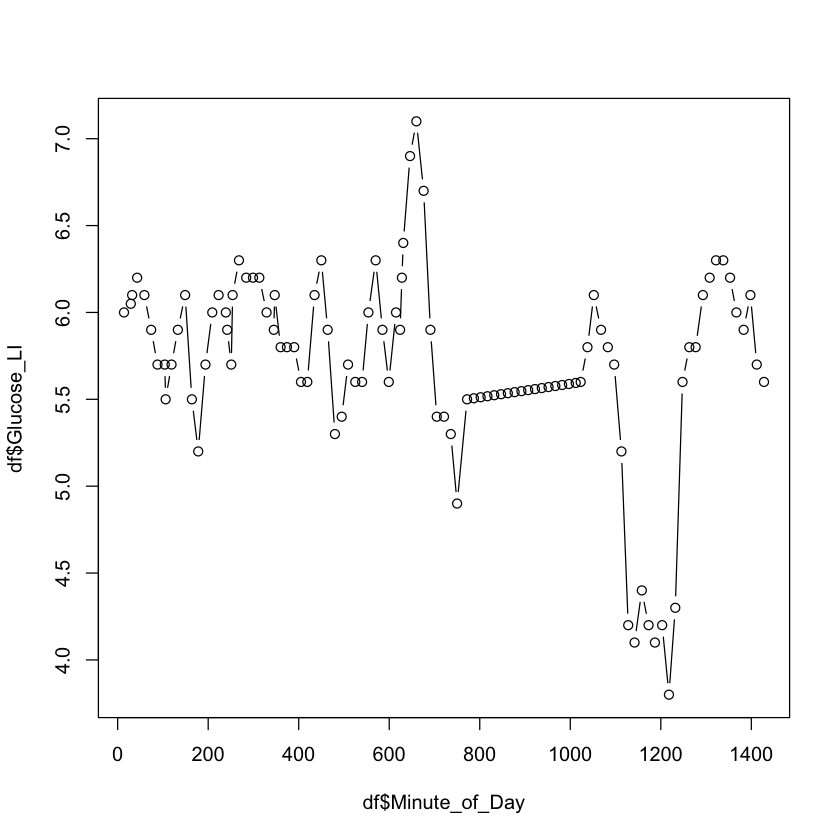

In [6]:
df['Glucose_LI'] <- na_interpolation(df$Inferred_Glucose, option = 'linear')
plot(df$Minute_of_Day, df$Glucose_LI, type = 'b')


# Spline Interpolation

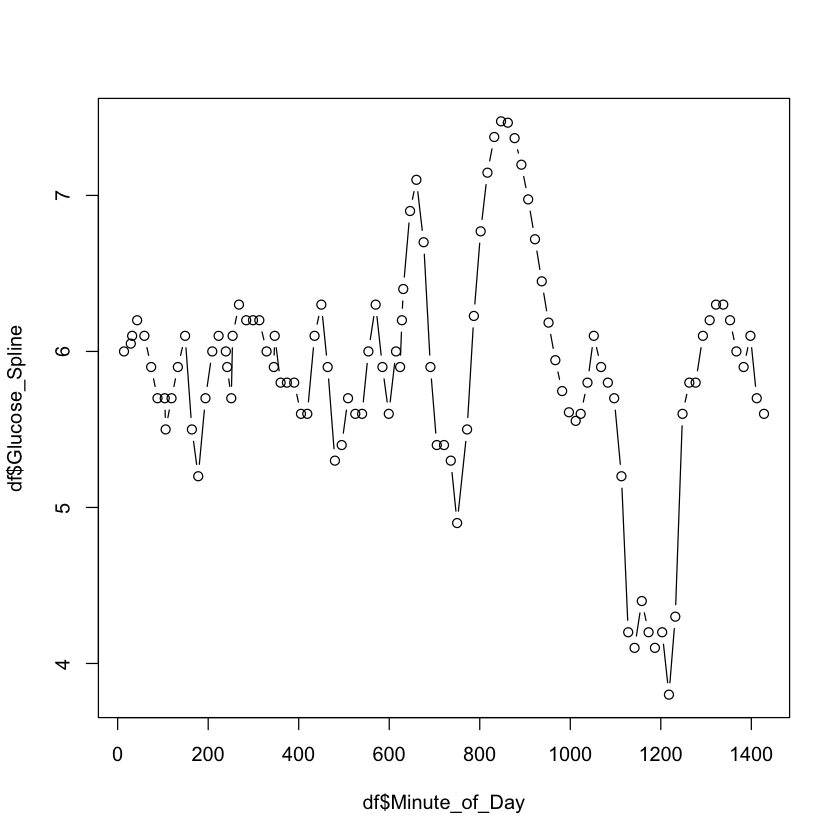

In [8]:
df['Glucose_Spline'] <- na_interpolation(df$Inferred_Glucose, option = 'spline')
plot(df$Minute_of_Day, df$Glucose_Spline, type = 'b')


# Kalman Filtering

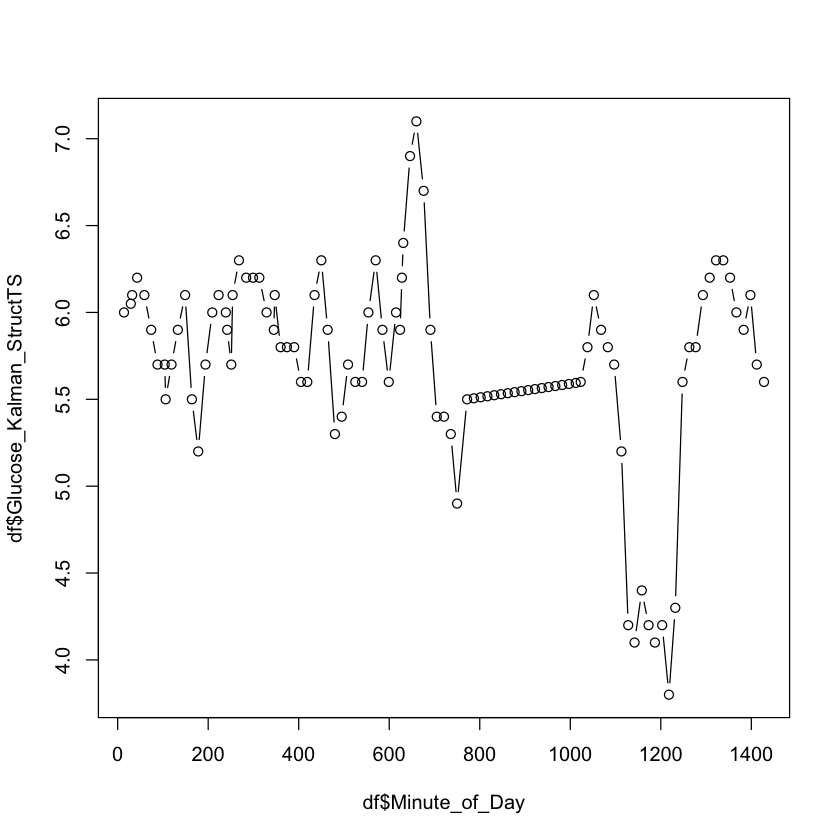

In [9]:
df['Glucose_Kalman_StructTS'] <- na_kalman(df$Inferred_Glucose, model = 'StructTS')
plot(df$Minute_of_Day, df$Glucose_Kalman_StructTS, type = 'b')

                                                 

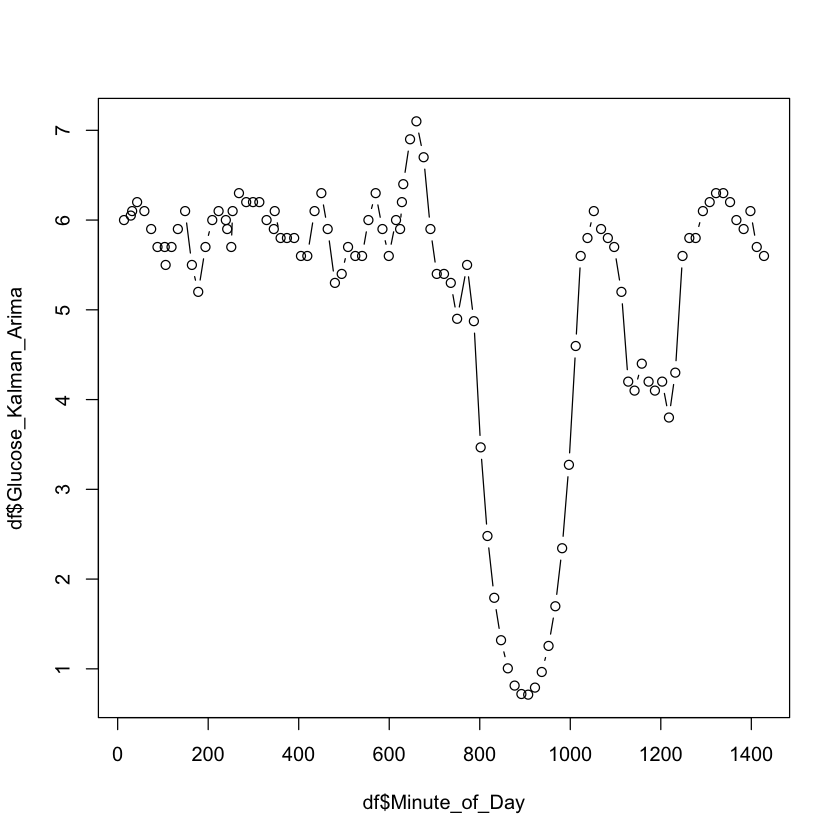

In [10]:
df['Glucose_Kalman_Arima'] <- na_kalman(df$Inferred_Glucose, model = 'auto.arima')
plot(df$Minute_of_Day, df$Glucose_Kalman_Arima, type = 'b')


# Moving Average

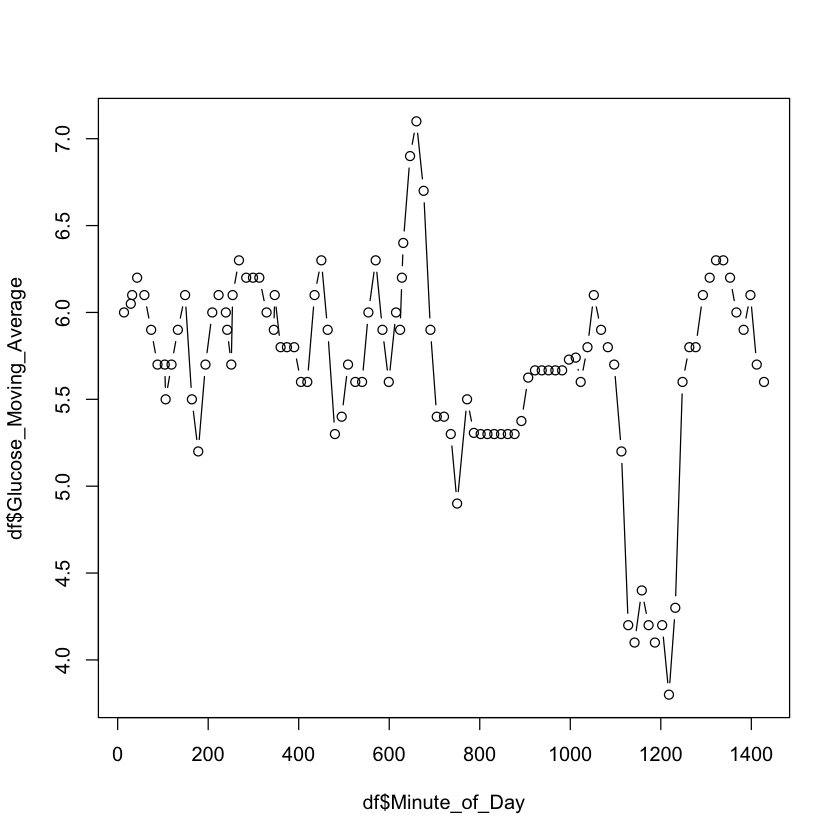

In [11]:
df['Glucose_Moving_Average'] <- na_ma(df$Inferred_Glucose, k = 4)
plot(df$Minute_of_Day, df$Glucose_Moving_Average, type = 'b')
 

# KNN imputation

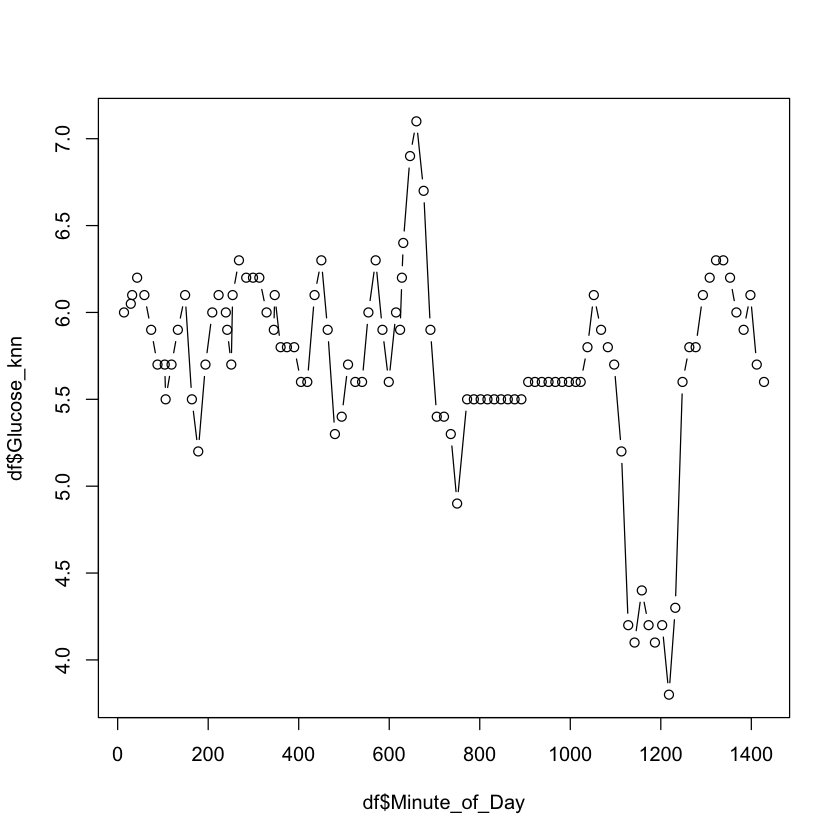

In [12]:
df['Glucose_knn'] <- VIM::kNN(df, variable = "Inferred_Glucose", k = 5)$Inferred_Glucose
plot(df$Minute_of_Day, df$Glucose_knn, type = 'b')


# Polynomial Interpolation

In [ ]:
df['Glucose_PI'] <- poly.regression(df$Inferred_Glucose, s = 0.2, impute = TRUE, na.only = TRUE)
plot(df$Minute_of_Day, df$Glucose_PI, type = 'b')